<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E1 BANK CHURN**

##### About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

##### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Churn_Modelling.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [152]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [153]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 0.013465642929077148 sec


<Figure size 640x480 with 0 Axes>

In [154]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


In [155]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=True):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42,tensorflow_init=True,pytorch_init=False)

### **1.1 Utility Functions**

#### Graph Functions:

In [156]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = target

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette="viridis", ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

#### Data Analysis Functions

In [157]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

### **1.2 Connect Drives**

In [158]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [159]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [160]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


## 2.0 Create Datasets

In [161]:
train = pd.read_csv('train.csv',index_col=0)
old_train = pd.read_csv("Churn_Modelling.csv")
test = pd.read_csv("test.csv",index_col=0)
sample_submission = pd.read_csv('sample_submission.csv',index_col=0)

# Drop column id
#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)
old_train.dropna(inplace=True,axis=0)
old_train.rename({"RowNumber":"id"},axis=1,inplace=True)
old_train.set_index("id", inplace=True)

In [162]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
print("OLD-TRAIN DATA: {}".format(old_train.shape))
display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (165034, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


OLD-TRAIN DATA: (9998, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


TEST DATA: (110023, 12)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.0,2,1.0,0.0,138882.09


In [163]:
def dtype_ass(df):
  int_list = ["Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
  num_list = ["CreditScore","Age","EstimatedSalary","Balance"]
  df[int_list] = df[int_list].astype("int64")
  df[num_list] = df[num_list].astype("float64")

  return df

train = dtype_ass(train)
test = dtype_ass(test)
old_train = dtype_ass(old_train)

In [164]:
list1 = set(list(train.CustomerId.unique()))
list2 = set(list(test.CustomerId.unique()))
print(len(list1),len(list2))
common_cost = list(set(list1).intersection(list2))
len(common_cost)

23221 19698


14445

In [165]:
summary(old_train).style.background_gradient(cmap='Reds')

data shape: (9998, 13)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,9996,15565701.000000,15815690.000000,15690732.000000
Surname,object,0,0.000000,2932,nan,nan,nan
CreditScore,float64,0,0.000000,460,350.000000,850.000000,652.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,73,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,6379,0.000000,250898.090000,97173.290000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,1.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


In [166]:
summary(train).style.background_gradient(cmap='Reds')

data shape: (165034, 13)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,23221,15565701.000000,15815690.000000,15690169.000000
Surname,object,0,0.000000,2797,nan,nan,nan
CreditScore,float64,0,0.000000,457,350.000000,850.000000,659.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,71,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,30075,0.000000,250898.090000,0.000000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,2.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


In [167]:
summary(test).style.background_gradient(cmap='Blues')

data shape: (110023, 12)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,19698,15565701.000000,15815690.000000,15690175.000000
Surname,object,0,0.000000,2708,nan,nan,nan
CreditScore,float64,0,0.000000,454,350.000000,850.000000,660.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,74,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,22513,0.000000,250898.090000,0.000000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,2.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


Old and New data are different. Old Data show a variaty in CosumerID equal to the number of observations, while new data show repeted values. Same applies for EstimatesdSalary and to a lesser extent to Balance.

The new Dataset show repeated combination of CostumerID, Surname, and EstimatedSalary.

In [168]:
cat_cols = train.select_dtypes(include=['object','int64']).columns
cat_cols

Index(['CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

**Test for duplicates**

In [169]:
train_d = train.drop(columns="Exited").copy()
train_d["dup"] = train_d.duplicated()
train_d[train_d["dup"]==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,dup
id,,,,,,,,,,,,,


## 3.0 Baseline Model:

In [170]:
# Preprocessing
def preprocess_data(train_df, test_df):
    # Separate features and target from training data
    X_train = train_df.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
    y_train = train_df['Exited']
    X_test = test_df.reset_index().drop(columns=['id', 'CustomerId', 'Surname'])

    # List of numerical and categorical columns
    num_cols = X_train.select_dtypes(include=['float64']).columns
    cat_cols = X_train.select_dtypes(include=['object','int64']).columns

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )

    return X_train, y_train, X_test, preprocessor

In [171]:
# Model Training and Prediction
def train_and_predict(X_train, y_train, X_test, preprocessor):
    # Define models
    models = {
        'RandomForest': RandomForestClassifier(random_state=17),
        'ExtraTrees': ExtraTreesClassifier(random_state=17),
        'GradientBoosting': GradientBoostingClassifier(random_state=17)
    }

    # Dictionary to store predictions
    predictions_score = {}

    # Cross_validation Strategy:
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    # Train each model and predict
    for name, model in models.items():
        print(f"Running {name} Model")
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Fit the model
        mean_score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

        # Predict and store
        predictions_score[name] = mean_score

    return predictions_score

In [172]:
# Preprocess the data
X_train, y_train, X_test, preprocessor = preprocess_data(train, test)

# Train models and make predictions
#predictions = train_and_predict(X_train, y_train, X_test, preprocessor)

In [173]:
#predictions

Baseline Results:

- 'RandomForest': 0.8709466218245403,
-  'ExtraTrees': 0.8581569776102255,
-  'GradientBoosting': 0.8884766649244149

### 3.1 Opt Baseline:

In [174]:
skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=48)

X = train.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
y = train['Exited']

def objective(trial):

      n_estimators = trial.suggest_int('n_estimators',100, 300, step=100)
      max_depth = trial.suggest_int('max_depth', 5, 20, step=5)
      min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=2)
      min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5, step=1)
      max_samples = trial.suggest_uniform("max_samples", 0.5, 1.0)
      max_features = trial.suggest_int("max_features", 5, 15, step=1)

      num_cols = X.select_dtypes(include=['float64']).columns
      cat_cols = X.select_dtypes(include=['object','int64']).columns

      preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

      clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_samples=max_samples)

      pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', clf)])

      score = cross_val_score(pipeline, X, y, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

      return score

In [175]:
# Create study object
study = optuna.create_study(direction="maximize", study_name="baseline_opt")

# Run optimization process
#study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2024-01-04 15:26:19,236] A new study created in memory with name: baseline_opt


In [176]:
#trial = study.best_trial
#print('AUC: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

In [177]:
print('''
AUC: 0.8866017826481439
Best hyperparameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_samples': 0.5815986886714628, 'max_features': 6}
''')


AUC: 0.8866017826481439
Best hyperparameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_samples': 0.5815986886714628, 'max_features': 6}



In [178]:
#fig = optuna.visualization.plot_optimization_history(study)
#fig.show()

## 4.0 Test for Duplicate Rows:

### 4.1 In train Dataset:

In [179]:
concat_df = pd.concat([train, old_train],axis=0, ignore_index=True)

In [180]:
y_concat = concat_df["Exited"]
X_concat = concat_df.drop("Exited",axis=1)

X_concat["dup"] = X_concat.duplicated()
X_concat["Exited"] = y_concat

In [181]:
duplicates = X_concat[X_concat.dup==True]
cols = ["CustomerId",	"Surname",	"CreditScore",	"Geography",	"Gender",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]

In [182]:
df = train.join(old_train.set_index(list(test.columns)),on=list(test.columns),how='inner',rsuffix='_o')
print(F'{len(df)=}')
print(F'{(df["Exited"]!=df["Exited_o"]).all()}')

len(df)=604
True


In [183]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
97,15576935,Ampt,743.0,Spain,Male,43.0,2,161807.18,2,0,1,93228.86,0,1
114,15603683,Ofodile,796.0,Spain,Female,23.0,3,146584.19,2,0,0,125445.80,1,0
543,15678727,Tan,770.0,Germany,Male,45.0,4,110765.68,1,1,0,26163.74,0,1
1615,15800514,Kenechukwu,477.0,Germany,Female,24.0,2,95675.62,2,0,0,162699.70,0,1
1933,15685019,Graham,528.0,France,Male,29.0,3,102787.42,1,1,0,55972.56,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162755,15744689,T'ang,479.0,Germany,Male,35.0,9,92833.89,1,1,0,99449.86,0,1
163068,15742272,Ozerova,669.0,France,Female,44.0,8,96418.09,1,0,0,131609.48,0,1
163865,15605130,Seccombe,753.0,France,Male,32.0,6,177729.13,1,1,1,161642.08,1,0


In [184]:
df[(df.CustomerId==15659428)&(df.Surname=="Maggard")&(df.CreditScore==520.0)&(df.Geography=="Spain")&(df.Gender=="Female")&(df.Tenure	==6)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
79643,15659428,Maggard,520.0,Spain,Female,42.0,6,0.0,2,1,1,34410.55,1,0


### 4.2 In Test Dataset:

In [185]:
concat_df = pd.concat([test, old_train],axis=0, ignore_index=True)

In [186]:
y_concat = concat_df["Exited"]
X_concat = concat_df.drop("Exited",axis=1)

X_concat["dup"] = X_concat.duplicated()
X_concat["Exited"] = y_concat

In [187]:
X_concat[X_concat.dup==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,dup,Exited
110027,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,True,1.0
110043,15625047,Yen,846.0,France,Female,38.0,5,0.00,1,1,1,187616.16,True,0.0
110048,15656300,Lucciano,411.0,France,Male,29.0,0,59697.17,2,1,1,53483.21,True,0.0
110065,15602280,Martin,829.0,Germany,Female,27.0,9,112045.67,1,1,1,119708.21,True,1.0
110066,15771573,Okagbue,637.0,Germany,Female,39.0,9,137843.80,1,1,1,117622.80,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119978,15677783,Graham,764.0,Spain,Male,38.0,4,113607.47,1,1,0,91094.46,True,0.0
119979,15681026,Lucciano,795.0,Germany,Female,33.0,9,104552.72,1,1,1,120853.83,True,1.0
119986,15603794,Pugliesi,623.0,France,Male,48.0,5,118469.38,1,1,1,158590.25,True,0.0
120018,15682355,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,True,1.0


In [188]:
testj = test.copy()
testj["Exited"] = np.nan

df_test = testj.join(old_train.set_index(list(test.columns)),on=list(test.columns),how='inner',rsuffix='_o')
print(F'{len(df_test)=}')
print(F'{(df_test["Exited"]!=df_test["Exited_o"]).all()}')

len(df_test)=398
True


In [189]:
df_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
165430,15732563,Swanton,726.0,Germany,Female,33.0,7,99046.31,2,1,1,56053.06,NaN,0
165722,15613749,Lees,569.0,Spain,Male,34.0,0,151839.26,1,1,0,102299.81,NaN,1
165984,15641595,Jonathan,685.0,Spain,Male,43.0,4,97392.18,2,1,0,43956.83,NaN,0
166638,15579617,Sinclair,489.0,France,Female,51.0,3,0.00,2,0,1,174098.28,NaN,1
167218,15807563,Ch'iu,841.0,France,Female,52.0,5,0.00,1,0,0,183239.71,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272929,15708362,Watson,793.0,France,Male,63.0,4,103729.79,2,1,1,80272.06,NaN,0
273022,15604295,Wei,543.0,France,Male,36.0,6,0.00,2,1,0,176728.28,NaN,0
273075,15694404,Eberegbulam,781.0,France,Female,42.0,3,156555.54,1,1,1,175674.01,NaN,0


In [190]:
len(df_test)/len(test)

0.0036174254474064514

### 4.3 Store Duplicate Results:

**Test**

In [191]:
df_test["Exited"] = df_test["Exited_o"]
df_test["Exited"].replace({0:1,1:0},inplace=True)
duplicate_index_test = df_test.index
duplicate_results_test = df_test.Exited.values

**Train**

In [192]:
df["Exited"] = df["Exited_o"]
df["Exited"].replace({0:1,1:0},inplace=True)
duplicate_index_train = df.index
duplicate_results_train = df.Exited.values

## 5.0 EDA

### 5.1 Num Features:

In [193]:
def test_transformation(df_, feature=None):

  df = df_.copy()

  # Separate features and target from training data
  X_ = df[feature].values.reshape(-1, 1)
  y_ = df['Exited']

  models = {'RandomForest': RandomForestClassifier(),
            'ExtraTrees': ExtraTreesClassifier(),
            'GradientBoosting': GradientBoostingClassifier()}

  scalers = {"StandardScaler":StandardScaler(),
             "MinMaxScaler":MinMaxScaler(),
             "RobustScaler":RobustScaler(unit_variance=True),
             "PowerTransformer_yj":PowerTransformer(method='yeo-johnson'),
             "PowerTransformer_bc":PowerTransformer(method='box-cox'),
             "QuantileTransformer_norm":QuantileTransformer(output_distribution='normal',subsample=20_000),
             "QuantileTransformer_unif":QuantileTransformer(output_distribution='uniform',subsample=20_000)}

  # Dictionary to store predictions
  predictions_score = pd.DataFrame(index=list(models.keys()),columns=list(scalers.keys()))

  # Cross_validation Strategy:
  skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

  # Train each model and predict
  for name, model in models.items():
    for name_scal, scaler in scalers.items():
      print(f"Running {name} Model with {name_scal}")
      # Create a pipeline with preprocessing and the model
      pipeline = Pipeline(steps=[('scaling', scaler), ('model', model)])

      # Fit the model
      mean_score = cross_val_score(pipeline, X_, y_, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

      # Predict and store
      predictions_score.loc[name,name_scal] = mean_score

  return predictions_score

#### EstimatedSalary

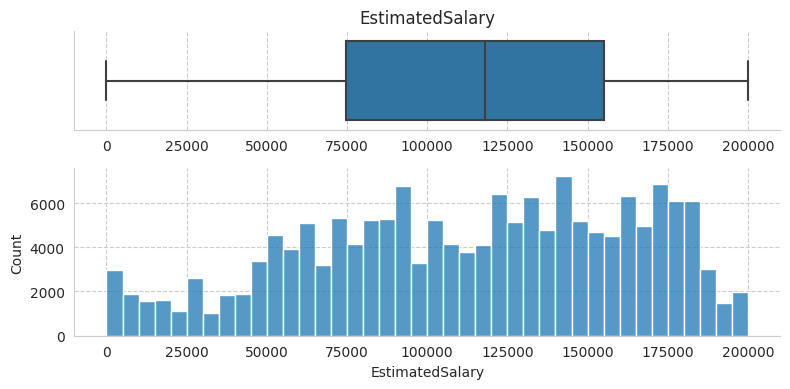

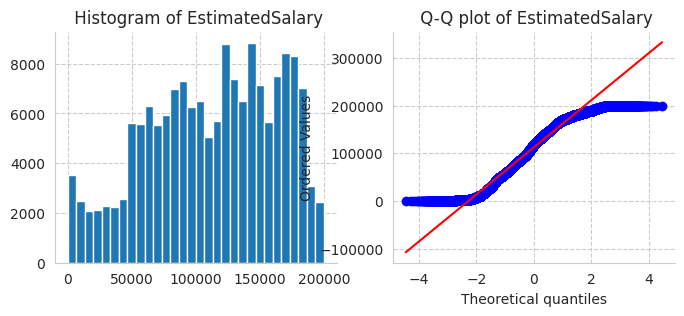

<Figure size 640x480 with 0 Axes>

In [194]:
df_ = train.copy()
plot_boxplot_and_hist(df_,"EstimatedSalary")
diagnostic_plots(df_, "EstimatedSalary");

In [195]:
scalers = {"None":None,
           "StandardScaler":StandardScaler(),
            "MinMaxScaler":MinMaxScaler(),
            "RobustScaler":RobustScaler(unit_variance=True),
            "PowerTransformer_yj":PowerTransformer(method='yeo-johnson'),
            "PowerTransformer_bc":PowerTransformer(method='box-cox'),
            "QuantileTransformer_norm":QuantileTransformer(output_distribution='normal',subsample=20_000),
            "QuantileTransformer_unif":QuantileTransformer(output_distribution='uniform',subsample=20_000)}

models = {'RandomForest': RandomForestClassifier(),
          'ExtraTrees': ExtraTreesClassifier(),
          'GradientBoosting': GradientBoostingClassifier()}

predictions_score = pd.DataFrame(index=list(models.keys()),columns=list(scalers.keys()))

for key in scalers.keys():
  for model in models.keys():
    #print(f"Scaler: {key} - Model: {model}")
    pipeline = Pipeline(steps=[('scaling', scalers[key]), ('model', models[model])])
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    X_ = df["EstimatedSalary"].values.reshape(-1, 1)
    y_ = df['Exited']

    #mean_score = cross_val_score(pipeline, X_, y_, n_jobs=-1, cv=skf, scoring="roc_auc").mean()
    #predictions_score.loc[model,key] = mean_score
    #print(mean_score,"\n")

In [196]:
#predictions_score.mean(axis=0)

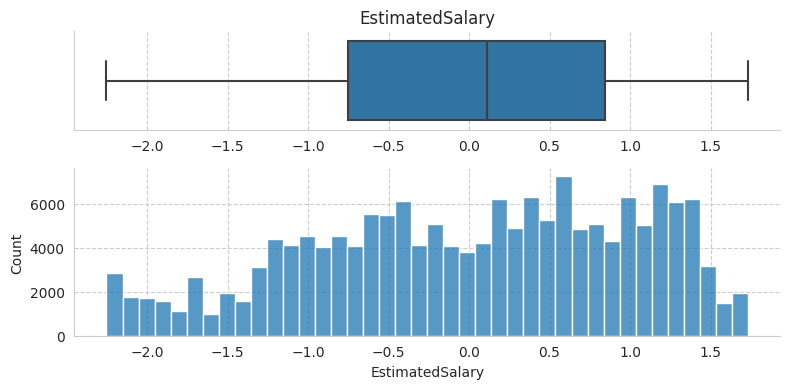

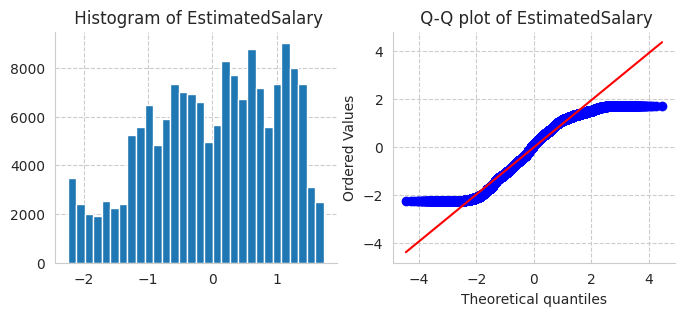

<Figure size 640x480 with 0 Axes>

In [197]:
scaler = PowerTransformer(method='box-cox')
df_["EstimatedSalary"] = scaler.fit_transform(df_["EstimatedSalary"].values.reshape(-1, 1))

plot_boxplot_and_hist(df_,"EstimatedSalary")
diagnostic_plots(df_, "EstimatedSalary")

#### Age

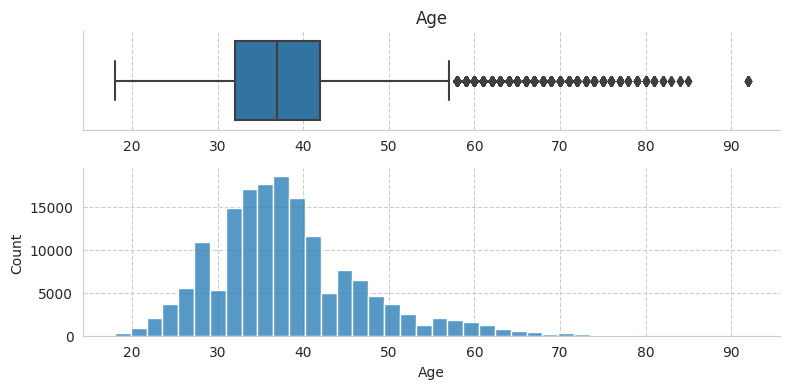

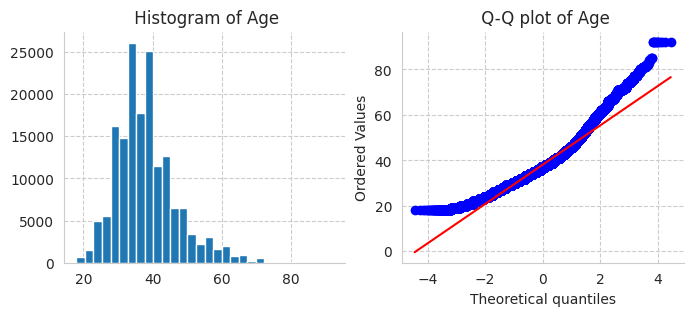

<Figure size 640x480 with 0 Axes>

In [198]:
df_ = train.copy()
plot_boxplot_and_hist(df_,"Age")
diagnostic_plots(df_, "Age");

In [199]:
scalers = {"None":None,
           "StandardScaler":StandardScaler(),
            "MinMaxScaler":MinMaxScaler(),
            "RobustScaler":RobustScaler(unit_variance=True),
            "PowerTransformer_yj":PowerTransformer(method='yeo-johnson'),
            #"PowerTransformer_bc":PowerTransformer(method='box-cox'),
            "QuantileTransformer_norm":QuantileTransformer(output_distribution='normal',subsample=20_000),
            "QuantileTransformer_unif":QuantileTransformer(output_distribution='uniform',subsample=20_000)}
models = {'RandomForest': RandomForestClassifier(),
          'ExtraTrees': ExtraTreesClassifier(),
          'GradientBoosting': GradientBoostingClassifier()}

predictions_score = pd.DataFrame(index=list(models.keys()),columns=list(scalers.keys()))

transformer = FunctionTransformer(np.log, inverse_func=np.exp)

for key in scalers.keys():
  for model in models.keys():
    #print(f"Scaler: {key} - Model: {model}")
    pipeline = Pipeline(steps=[('log_trans', transformer),('scaling', scalers[key]), ('model', models[model])])
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    X_ = df["Age"].values.reshape(-1, 1)
    y_ = df['Exited']

    #mean_score = cross_val_score(pipeline, X_, y_, n_jobs=-1, cv=skf, scoring="roc_auc").mean()
    #predictions_score.loc[model,key] = mean_score
    #print(mean_score,"\n")

In [200]:
#predictions_score.mean(axis=0)

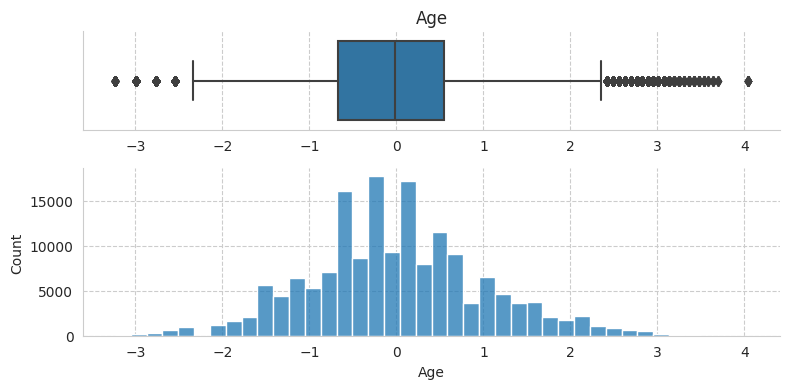

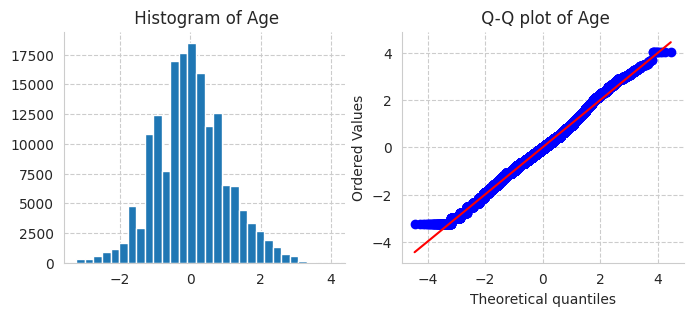

<Figure size 640x480 with 0 Axes>

In [201]:
df_["Age"] = np.log(df_["Age"])
scaler = StandardScaler()
df_["Age"] = scaler.fit_transform(df_["Age"].values.reshape(-1, 1))

plot_boxplot_and_hist(df_,"Age")
diagnostic_plots(df_, "Age");

#### **CreditScore**

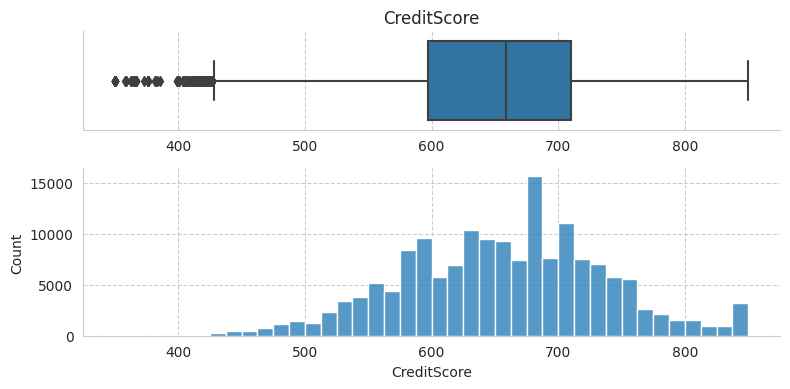

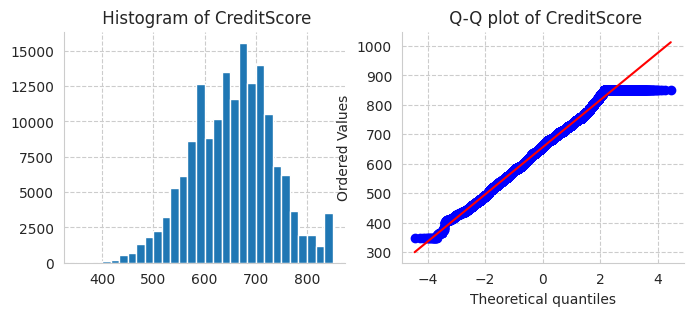

<Figure size 640x480 with 0 Axes>

In [202]:
df_ = train.copy()
plot_boxplot_and_hist(df_,"CreditScore")
diagnostic_plots(df_, "CreditScore");

In [203]:
scalers = {"None":None,
           "StandardScaler":StandardScaler(),
            "MinMaxScaler":MinMaxScaler(),
            "RobustScaler":RobustScaler(unit_variance=True),
            "PowerTransformer_yj":PowerTransformer(method='yeo-johnson'),
            "PowerTransformer_bc":PowerTransformer(method='box-cox'),
            "QuantileTransformer_norm":QuantileTransformer(output_distribution='normal',subsample=20_000),
            "QuantileTransformer_unif":QuantileTransformer(output_distribution='uniform',subsample=20_000)}
models = {'RandomForest': RandomForestClassifier(),
          'ExtraTrees': ExtraTreesClassifier(),
          'GradientBoosting': GradientBoostingClassifier()}

predictions_score = pd.DataFrame(index=list(models.keys()),columns=list(scalers.keys()))

#transformer = FunctionTransformer(np.log, inverse_func=np.exp)

for key in scalers.keys():
  for model in models.keys():
    #print(f"Scaler: {key} - Model: {model}")
    pipeline = Pipeline(steps=[('scaling', scalers[key]), ('model', models[model])])
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    X_ = df["CreditScore"].values.reshape(-1, 1)
    y_ = df['Exited']

    #mean_score = cross_val_score(pipeline, X_, y_, n_jobs=-1, cv=skf, scoring="roc_auc").mean()
    #predictions_score.loc[model,key] = mean_score

In [204]:
#predictions_score.mean(axis=0)

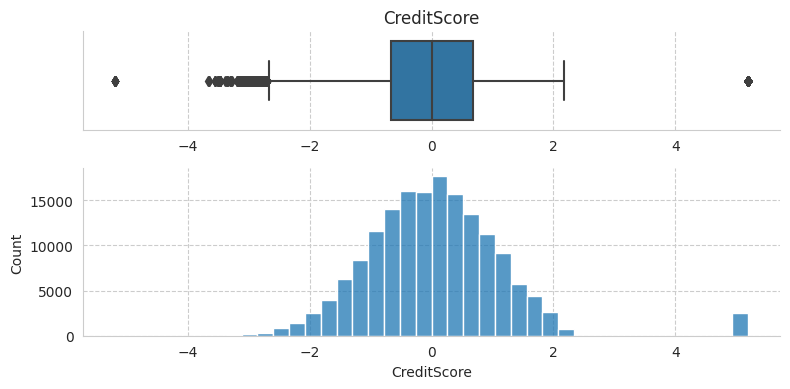

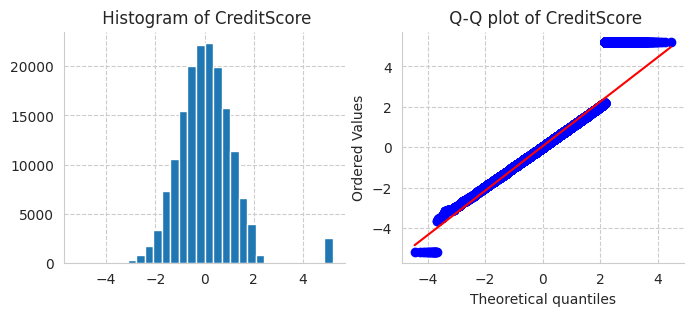

<Figure size 640x480 with 0 Axes>

In [205]:
#df_["CreditScore"] = np.log(df_["CreditScore"])
scaler = QuantileTransformer(output_distribution='normal',subsample=40_000)
df_["CreditScore"] = scaler.fit_transform(df_["CreditScore"].values.reshape(-1, 1))

plot_boxplot_and_hist(df_,"CreditScore")
diagnostic_plots(df_, "CreditScore");

#### **Balance**

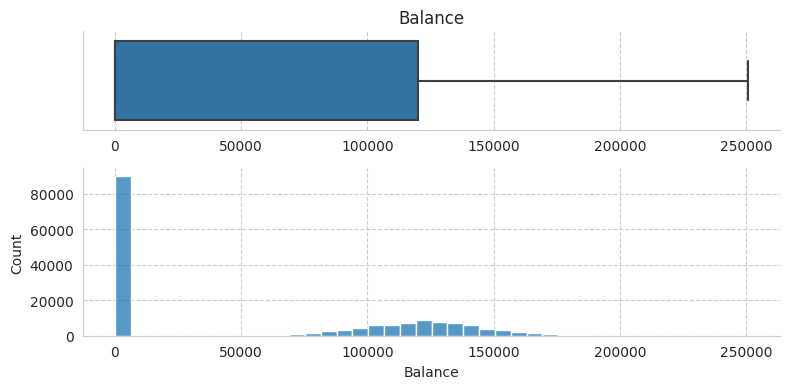

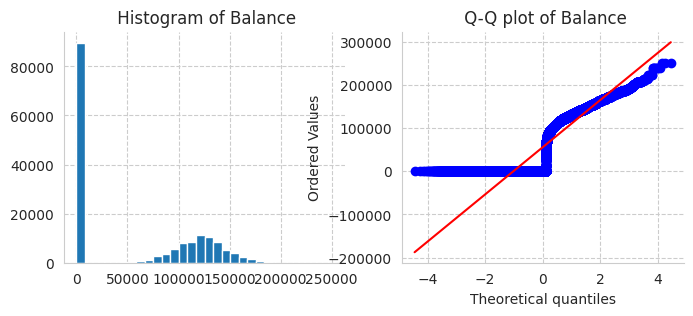

<Figure size 640x480 with 0 Axes>

In [206]:
df_ = train.copy()
plot_boxplot_and_hist(df_,"Balance")
diagnostic_plots(df_, "Balance");

In [207]:
scalers = {"None":None,
            "StandardScaler":StandardScaler(),
            "MinMaxScaler":MinMaxScaler(),
            "RobustScaler":RobustScaler(unit_variance=True),
            "PowerTransformer_yj":PowerTransformer(method='yeo-johnson', ),
            #"PowerTransformer_bc":PowerTransformer(method='box-cox'),
            "QuantileTransformer_norm":QuantileTransformer(output_distribution='normal',subsample=20_000),
            "QuantileTransformer_unif":QuantileTransformer(output_distribution='uniform',subsample=20_000)}
models = {'RandomForest': RandomForestClassifier(),
          'ExtraTrees': ExtraTreesClassifier(),
          'GradientBoosting': GradientBoostingClassifier()}

predictions_score = pd.DataFrame(index=list(models.keys()),columns=list(scalers.keys()))

#transformer = FunctionTransformer(np.log, inverse_func=np.exp)

for key in scalers.keys():
  for model in models.keys():
    #print(f"Scaler: {key} - Model: {model}")
    pipeline = Pipeline(steps=[('scaling', scalers[key]), ('model', models[model])])
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    X_ = df["Balance"].values.reshape(-1, 1)
    y_ = df['Exited']

    #mean_score = cross_val_score(pipeline, X_, y_, n_jobs=-1, cv=skf, scoring="roc_auc").mean()
    #predictions_score.loc[model,key] = mean_score

In [208]:
#predictions_score.mean(axis=0)

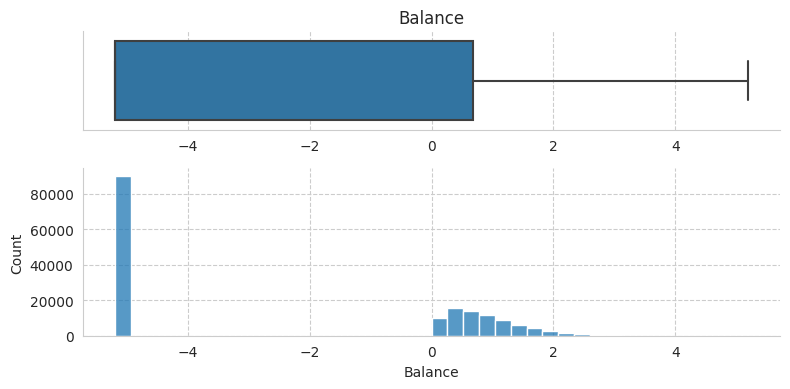

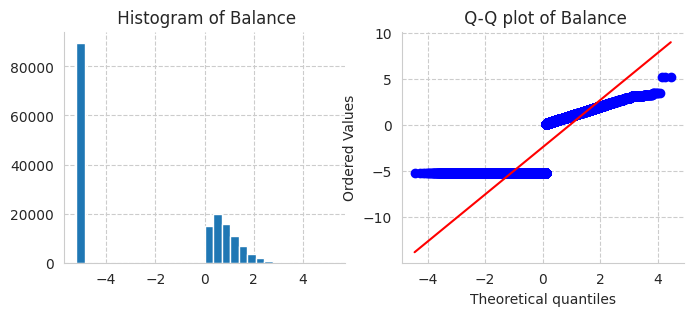

<Figure size 640x480 with 0 Axes>

In [209]:
#df_["CreditScore"] = np.log(df_["CreditScore"])
scaler = QuantileTransformer(output_distribution='normal',subsample=40_000)

df_["Balance"] = scaler.fit_transform(df_["Balance"].values.reshape(-1, 1))

plot_boxplot_and_hist(df_,"Balance")
diagnostic_plots(df_, "Balance");

### 5.2 Cat Features:

In [210]:
def plot_cat_features(df,cat_var, rows=2,figsize=(12,6)):
  df_=df.copy()
  fig, axs = plt.subplots(rows,3,figsize=figsize)
  axs=np.ravel(axs)

  for num, cvar in enumerate(cat_var):
    stacked_cvar = df_.groupby(["Exited",cvar])[cvar].agg("count").unstack("Exited")
    stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato'],ax=axs[num])

  plt.tight_layout()

In [211]:
cat_cols = X.select_dtypes(include=['object','int64']).columns

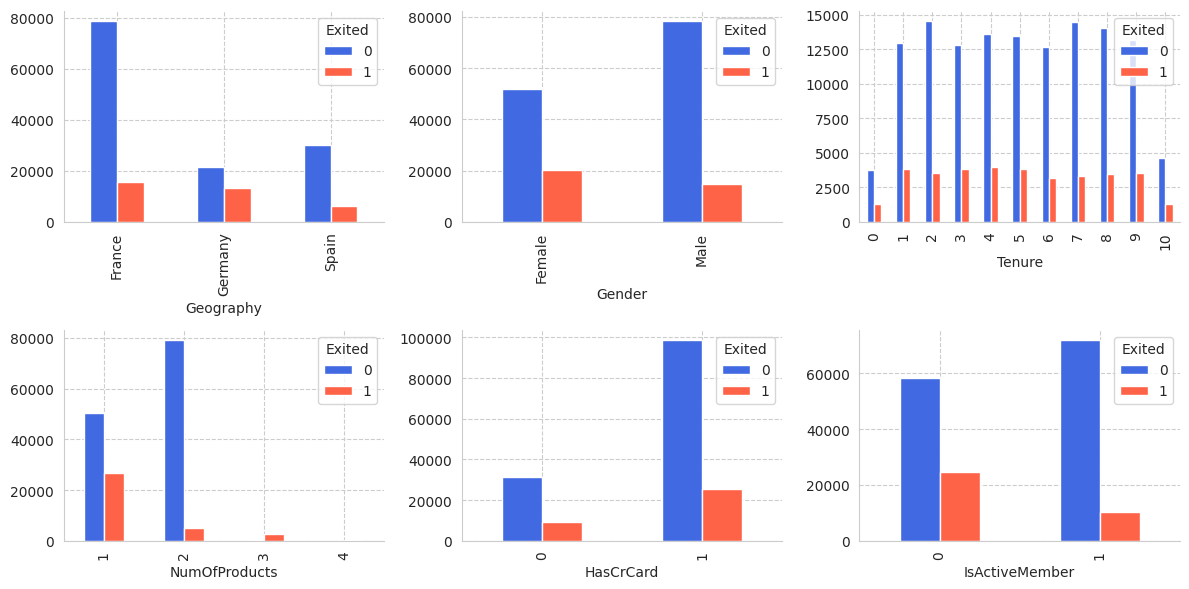

In [212]:
plot_cat_features(train,cat_cols)

#### 5.2.1 New Categorical:

**NumOfProducts** exceeding 2 have very low occurance, therefore they are aggregated:

In [213]:
train.NumOfProducts.replace({4:3},inplace=True)
test.NumOfProducts.replace({4:3},inplace=True)

In [220]:
def age_tr(df) :
    df['Age_Category'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    return df

train = age_tr(train)
test = age_tr(test)

In [274]:
def cred_score_tr(df) :
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 500, 600, 700, 800, 1000], labels=['0-500', '500-600', '600-700', '700-800','800+'])
    return df
train = cred_score_tr(train)
test = cred_score_tr(test)

In [216]:
def geo_gender_tr(df) :
    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
    return df

train = geo_gender_tr(train)
test = geo_gender_tr(test)

In [217]:
def salary_tr(df) :
    df['EstimatedSalary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0, 50_000, 100_000, 150_000, 200_000], labels=['0-50', '50-100', '100-150', '150+'])
    return df
train = salary_tr(train)
test = salary_tr(test)

In [222]:
def balance_tr(df) :
    df['Balance_Range'] = pd.cut(df['Balance'],  bins=[-1, 1, 100_000, 125_000, 150_000, 500_000], labels=['0', '0-100', '100-125', '125-150', '150+'])
    return df
train = balance_tr(train)
test = balance_tr(test)

In [225]:
#train.isna().sum(),test.isna().sum()

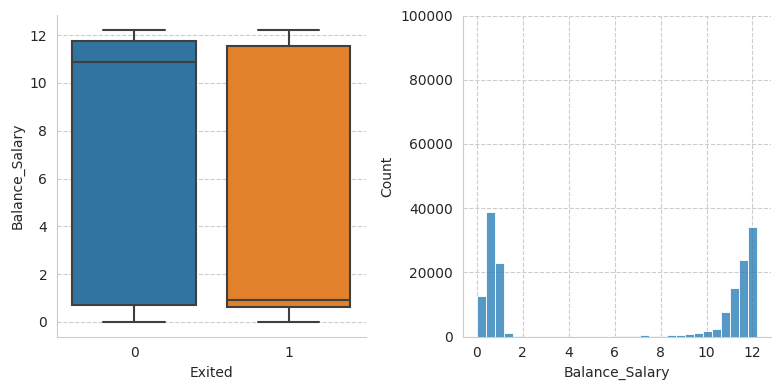

In [226]:
train["Balance_Salary"] = train["EstimatedSalary"]/(train["Balance"]+1)
train["Balance_Salary"] = np.log(train["Balance_Salary"]+1)

test["Balance_Salary"] = test["EstimatedSalary"]/(test["Balance"]+1)
test["Balance_Salary"] = np.log(test["Balance_Salary"]+1)

#sns.boxplot(data=train.sample(1000), x="Balance_salary")
_, ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(data=train, x="Exited", y="Balance_Salary",ax=ax[0])
sns.histplot(data=train,x="Balance_Salary",ax=ax[1])
ax[1].set_ylim(0,100_000)
plt.tight_layout()

In [227]:
def balance_sal_tr(df) :
    df['Balance_Salary_Range'] = pd.cut(df['Balance_Salary'],  bins=[0, 1, 100], labels=['0','1'])
    return df
train = balance_sal_tr(train)
test = balance_sal_tr(test)

In [228]:
def card_active_tr(df) :
    df['bs_active'] = df['Balance_Salary_Range'].astype("str") + '_' + df['IsActiveMember'].astype("str")
    return df

train = card_active_tr(train)
test = card_active_tr(test)

In [229]:
def bs_gender_tr(df) :
    df['bs_gender'] = df['Balance_Salary_Range'].astype("str") + '_' + df['Gender'].astype("str")
    return df

train = bs_gender_tr(train)
test = bs_gender_tr(test)

In [230]:
def bs_nop_tr(df) :
    df['bs_nop'] = df['Balance_Salary_Range'].astype("str") + '_' + df['NumOfProducts'].astype("str")
    df['bs_nop'] = df['bs_nop'].replace({"0_3":"3","1_3":"3"})
    return df

train = bs_nop_tr(train)
test = bs_nop_tr(test)

In [265]:
def bs_age_tr(df) :
    df['bs_age'] = df['Balance_Salary_Range'].astype("str") + '_' + df['Age_Category'].astype("str")
    replace_rel = dict(zip(["1_18-30","1_30-40"],[1,0]))
    not_rel = {'0_18-30':0, '0_30-40':0, '0_40-50':0, '0_50-60':0, '0_60+':0, '1_40-50':0, '1_50-60':0, '1_60+':0}

    df['bs_age'] = df['bs_age'].replace(replace_rel)
    df['bs_age'] = df['bs_age'].replace(not_rel)

    return df

train = bs_age_tr(train)
test = bs_age_tr(test)

In [266]:
#test.drop("bs_geo",axis=1,inplace=True)
#train.drop("bs_geo",axis=1,inplace=True)

In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CustomerId             165034 non-null  int64   
 1   Surname                165034 non-null  object  
 2   CreditScore            165034 non-null  float64 
 3   Geography              165034 non-null  object  
 4   Gender                 165034 non-null  object  
 5   Age                    165034 non-null  float64 
 6   Tenure                 165034 non-null  int64   
 7   Balance                165034 non-null  float64 
 8   NumOfProducts          165034 non-null  int64   
 9   HasCrCard              165034 non-null  int64   
 10  IsActiveMember         165034 non-null  int64   
 11  EstimatedSalary        165034 non-null  float64 
 12  Exited                 165034 non-null  int64   
 13  Age_Category           165034 non-null  category
 14  Credit_Score_Range  

In [268]:
X = train.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
y = train['Exited']

cat_cols = X.select_dtypes(include=['object','int64','category']).columns
cat_cols

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Age_Category', 'Credit_Score_Range', 'Geo_Gender',
       'EstimatedSalary_Range', 'Balance_Range', 'Balance_Salary_Range',
       'bs_active', 'bs_gender', 'bs_nop', 'bs_age'],
      dtype='object')

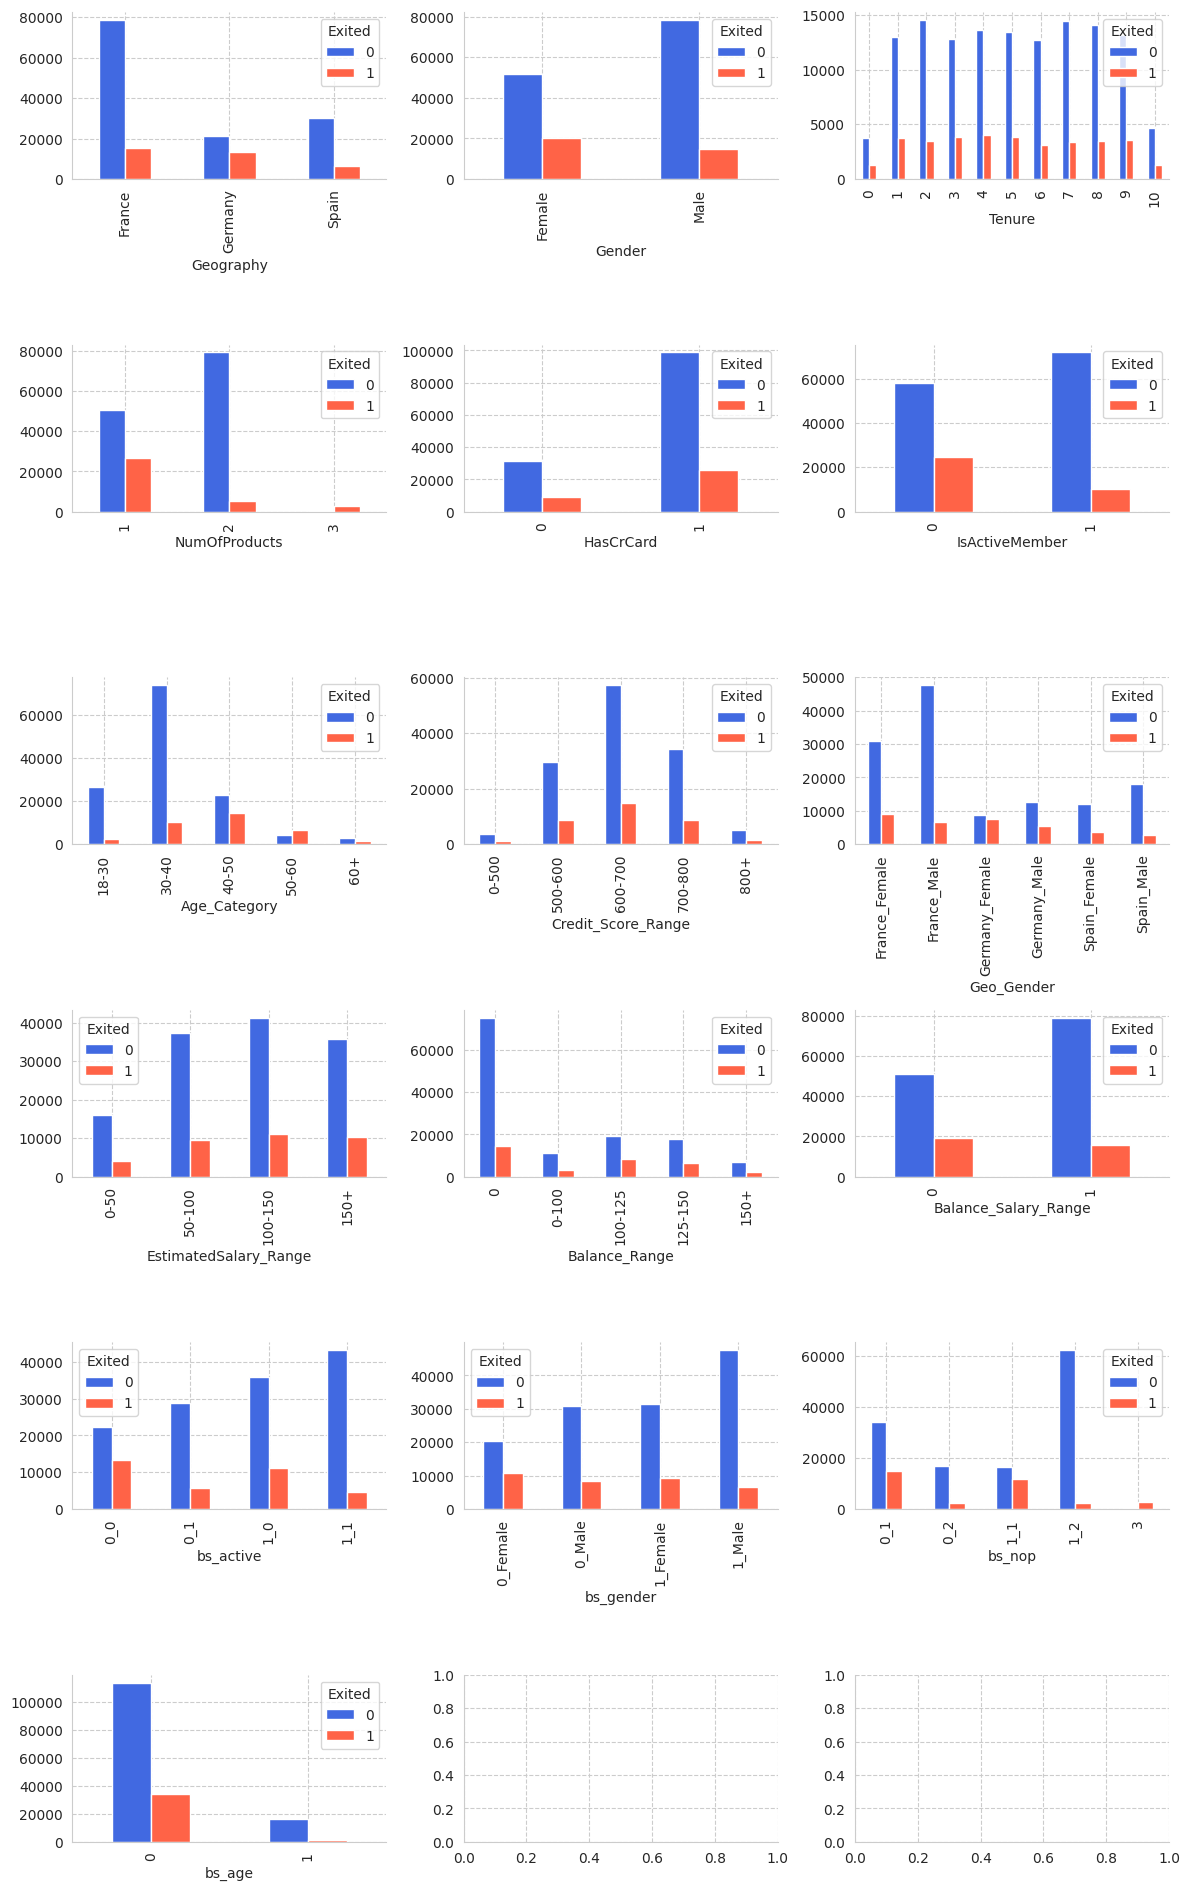

In [275]:
plot_cat_features(train,cat_cols, rows=6, figsize=(12,19))

In [277]:
train.isna().sum()

CustomerId               0
Surname                  0
CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Age_Category             0
Credit_Score_Range       0
Geo_Gender               0
EstimatedSalary_Range    0
Balance_Range            0
Balance_Salary           0
Balance_Salary_Range     0
bs_active                0
bs_gender                0
bs_nop                   0
bs_age                   0
dtype: int64

In [240]:
#train.groupby(["gen_ten","Exited"]).size().unstack("Exited")

In [270]:
verify = train.groupby(["bs_age","Exited"]).size().unstack("Exited")
verify["ratio"] = verify.loc[:,0].divide(verify.loc[:,1])
verify

Exited,0,1,ratio
bs_age,,,
0,113737,33904,3.354678
1,16376,1017,16.102262


In [271]:
verify = train.groupby(["Age_Category","Exited"]).size().unstack("Exited")
verify["ratio"] = verify.loc[:,0].divide(verify.loc[:,1])
verify

Exited,0,1,ratio
Age_Category,,,
18-30,26483,2386,11.099329
30-40,73812,10102,7.306672
40-50,22715,14409,1.576445
50-60,4349,6762,0.643153
60+,2754,1262,2.182250


In [272]:
verify = train.groupby(["Balance_Salary_Range","Exited"]).size().unstack("Exited")
verify["ratio"] = verify.loc[:,0].divide(verify.loc[:,1])
verify

Exited,0,1,ratio
Balance_Salary_Range,,,
0,51140,19185,2.665624
1,78973,15736,5.018620


#### 5.2.2 New Datasets

In [296]:
train_ = train.drop(["Age","Balance","EstimatedSalary","CreditScore","Balance_Salary"],axis=1)
test_ = test.drop(["Age","Balance","EstimatedSalary","CreditScore","Balance_Salary"],axis=1)

## 6.0 Test Preprocessing:

In [285]:
# Preprocessing
def preprocess_data(train_df, test_df):
    # Separate features and target from training data
    X_train = train_df.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
    y_train = train_df['Exited']
    X_test = test_df.reset_index().drop(columns=['id', 'CustomerId', 'Surname'])

    # List of numerical and categorical columns
    num_cols = X_train.select_dtypes(include=['float64']).columns
    cat_cols = X_train.select_dtypes(include=['object','int64']).columns

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                                  ]
                                      )

    return X_train, y_train, X_test, preprocessor

In [286]:
# Model Training and Prediction
def train_and_predict(X_train, y_train, X_test, preprocessor):
    # Define models
    models = {
        'RandomForest': RandomForestClassifier(random_state=17),
    }

    # Dictionary to store predictions
    predictions_score = {}

    # Cross_validation Strategy:
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    # Train each model and predict
    for name, model in models.items():
        print(f"Running {name} Model")
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Fit the model
        mean_score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

        # Predict and store
        predictions_score[name] = mean_score

    return predictions_score

In [298]:
# Preprocess the data
X_train, y_train, X_test, preprocessor = preprocess_data(train_, test_)

# Train models and make predictions
#predictions = train_and_predict(X_train, y_train, X_test, preprocessor)
#predictions

- 'RandomForest': 0.8707789734227862,
- 'ExtraTrees': 0.8572940528675334,
- 'GradientBoosting': 0.8884781981419085

VS:

- 'RandomForest': 0.8709466218245403,
- 'ExtraTrees': 0.8581569776102255,
- 'GradientBoosting': 0.8884766649244149

In [299]:
# Preprocess the data
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier(random_state=17))])

pipeline.fit(X_t, y_t)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Geo_Gender', 'bs_active', 'bs_gender', 'bs_nop',
       'bs_age'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=17))])

In [300]:
print(f"RF train accuracy: {pipeline.score(X_t, y_t):.3f}")
print(f"RF test accuracy: {pipeline.score(X_v, y_v):.3f}")

RF train accuracy: 0.837
RF test accuracy: 0.834


In [301]:
feature_names = pipeline[:-1].get_feature_names_out()

mdi_importances = pd.Series(pipeline[-1].feature_importances_, index=feature_names).sort_values(ascending=True)

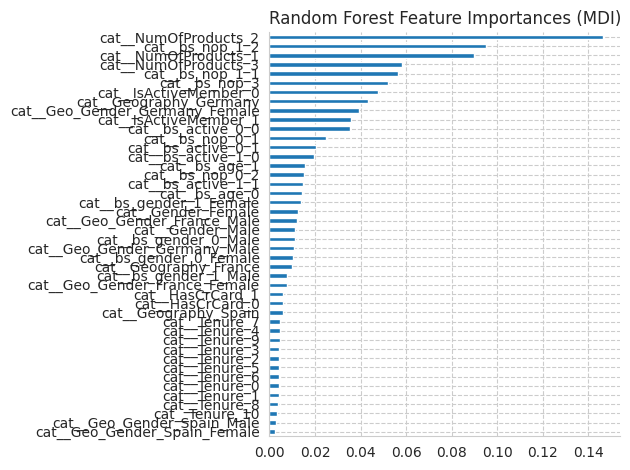

In [302]:
fig, ax = plt.subplots(1,1,figsize=(6,10))
mdi_importances.plot.barh(ax=ax)
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

In [304]:
X_v

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Age_Category,Credit_Score_Range,Geo_Gender,EstimatedSalary_Range,Balance_Range,Balance_Salary_Range,bs_active,bs_gender,bs_nop,bs_age
47555,France,Male,8,2,1,0,40-50,500-600,France_Male,50-100,0,1,1_0,1_Male,1_2,0
142335,France,Male,1,3,1,0,30-40,800+,France_Male,100-150,0,1,1_0,1_Male,3,0
125861,France,Male,9,2,1,0,30-40,500-600,France_Male,150+,0,1,1_0,1_Male,1_2,0
13099,France,Male,3,1,0,0,30-40,600-700,France_Male,100-150,0,1,1_0,1_Male,1_1,0
96966,France,Male,9,1,0,0,18-30,600-700,France_Male,150+,125-150,0,0_0,0_Male,0_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73200,France,Male,7,1,0,0,30-40,700-800,France_Male,150+,0,1,1_0,1_Male,1_1,0
28531,Spain,Male,1,2,0,1,30-40,600-700,Spain_Male,0-50,0,1,1_1,1_Male,1_2,0
32074,France,Male,2,2,0,1,18-30,700-800,France_Male,0-50,100-125,0,0_1,0_Male,0_2,0
20763,France,Male,7,2,1,1,30-40,700-800,France_Male,100-150,0,1,1_1,1_Male,1_2,0


https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

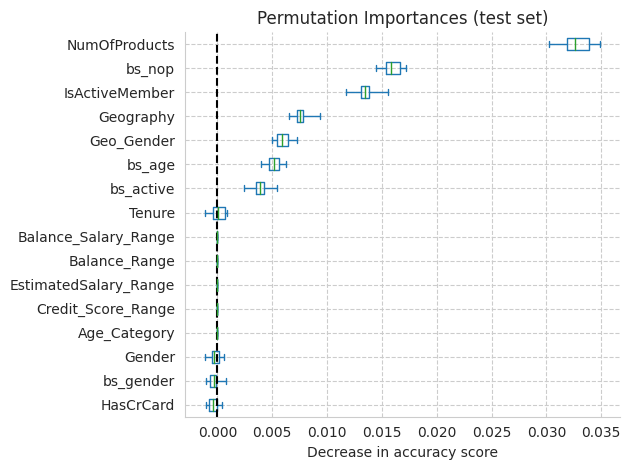

In [305]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipeline, X_v, y_v, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_v.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## 7.0 Multiple Accounts:

In [57]:
double_accounts = train.reset_index().groupby(["CustomerId","Surname","EstimatedSalary","Geography","Gender","Age","CreditScore"], as_index=False)[["Balance"]].agg({"Balance":"count"})
double_accounts.sort_values("Balance",axis=0,ascending=False, inplace=True)
double_accounts.rename({"Balance":"Tot_accounts_by_country"},axis=1,inplace=True)
double_accounts.head(3)

,CustomerId,Surname,EstimatedSalary,Geography,Gender,Age,CreditScore,Tot_accounts_by_country
47784,15643696,Young,142917.54,France,Male,49.0,611.0,8
15938,15591248,Chukwumaobim,34857.46,France,Female,29.0,628.0,8
149848,15794414,Forbes,51424.29,Spain,Male,46.0,507.0,7


In [58]:
merge_col = ["CustomerId","Surname","EstimatedSalary","Geography","Gender","Age","CreditScore"]

df = train.join(double_accounts.set_index(merge_col),on=merge_col,how='inner',rsuffix='_o')
df.isna().sum()

CustomerId                 0
Surname                    0
CreditScore                0
Geography                  0
Gender                     0
Age                        0
Tenure                     0
Balance                    0
NumOfProducts              0
HasCrCard                  0
IsActiveMember             0
EstimatedSalary            0
Exited                     0
Tot_accounts_by_country    0
dtype: int64

In [59]:
double_accounts = train.reset_index().groupby(["CustomerId","Surname","EstimatedSalary","Gender","Age","CreditScore"], as_index=False)[["Balance"]].agg({"Balance":"count"})
double_accounts.sort_values("Balance",axis=0,ascending=False, inplace=True)
double_accounts.rename({"Balance":"Tot_accounts_by_person"},axis=1,inplace=True)
double_accounts.head()

,CustomerId,Surname,EstimatedSalary,Gender,Age,CreditScore,Tot_accounts_by_person
47467,15643696,Young,142917.54,Male,49.0,611.0,10
15836,15591248,Chukwumaobim,34857.46,Female,29.0,628.0,10
56425,15657105,Chukwualuka,195192.40,Male,36.0,726.0,9
16958,15592387,Burke,54926.51,Male,30.0,566.0,8
148860,15794414,Forbes,51424.29,Male,46.0,507.0,8


In [60]:
merge_col = ["CustomerId","Surname","EstimatedSalary","Gender","Age","CreditScore"]

df = df.join(double_accounts.set_index(merge_col),on=merge_col,how='inner',rsuffix='_o')
df.shape,train.shape

((165034, 15), (165034, 13))

In [61]:
df.isna().sum()

CustomerId                 0
Surname                    0
CreditScore                0
Geography                  0
Gender                     0
Age                        0
Tenure                     0
Balance                    0
NumOfProducts              0
HasCrCard                  0
IsActiveMember             0
EstimatedSalary            0
Exited                     0
Tot_accounts_by_country    0
Tot_accounts_by_person     0
dtype: int64

In [62]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tot_accounts_by_country,Tot_accounts_by_person
id,,,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668.0,France,Male,33.0,3,0.00,2,1,0,181449.97,0,1,1
1,15749177,Okwudiliolisa,627.0,France,Male,33.0,1,0.00,2,1,1,49503.50,0,1,1
2,15694510,Hsueh,678.0,France,Male,40.0,10,0.00,2,1,0,184866.69,0,1,1
3,15741417,Kao,581.0,France,Male,34.0,2,148882.54,1,1,1,84560.88,0,1,1
4,15766172,Chiemenam,716.0,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0,1,1


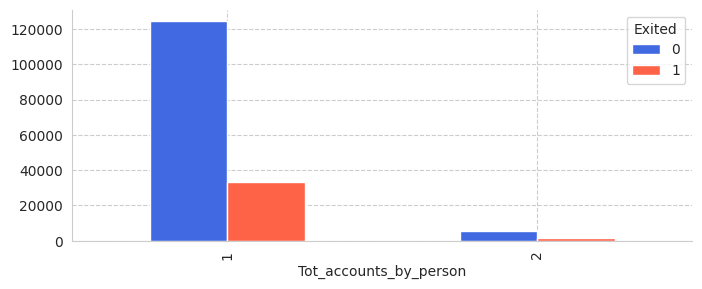

In [63]:
fig,axs=plt.subplots(1,1,figsize=(8,3),sharex=True)

df_=df.copy()
df_["Tot_accounts_by_person"] = df_["Tot_accounts_by_person"].clip(0, 2)
df_bc = df_.groupby(["Tot_accounts_by_person","Exited"])["Exited"].agg("count").unstack("Tot_accounts_by_person")
#

df_bc.T.plot(kind='bar', stacked=False, color=['royalblue', 'tomato'], ax=axs);

In [64]:
df_bc

Tot_accounts_by_person,1,2
Exited,,
0,124784,5329
1,33535,1386
